# Fitbit Analysis

Aubrey Roberts

5/21/24


In [1]:
# Load packages
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
import csv

# Test Case (1 participant)

In [2]:
# Specify data of interest 
path = "/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/101_qtz1b11266425116974769_hr_WearableFitbit_Fitbit.csv"

### Read in Control Participant Data

In [3]:
# Read in dataframe
df = pd.read_csv(path)
df = pd.DataFrame(df)

# select only columns of interest
# df = df[['device', 'value', 'target_hr_45', 'target_hr_55', 'target_hr_70', 'ppt_id', '_realtime']]

# Print participant ID
print('Participant number:', df['ppt_id'].unique())

# convert to date only
df['_realtime'] = pd.to_datetime(df['_realtime'])
df['_realdate'] = df['_realtime'].dt.date

# count unique dates of wearing Fitbit
print('Num unique dates:', df['_realdate'].nunique())

Participant number: [101]
Num unique dates: 65


### Data Visualization

Heart rate targets: 120.4 133.60000000000002 153.39999999999998


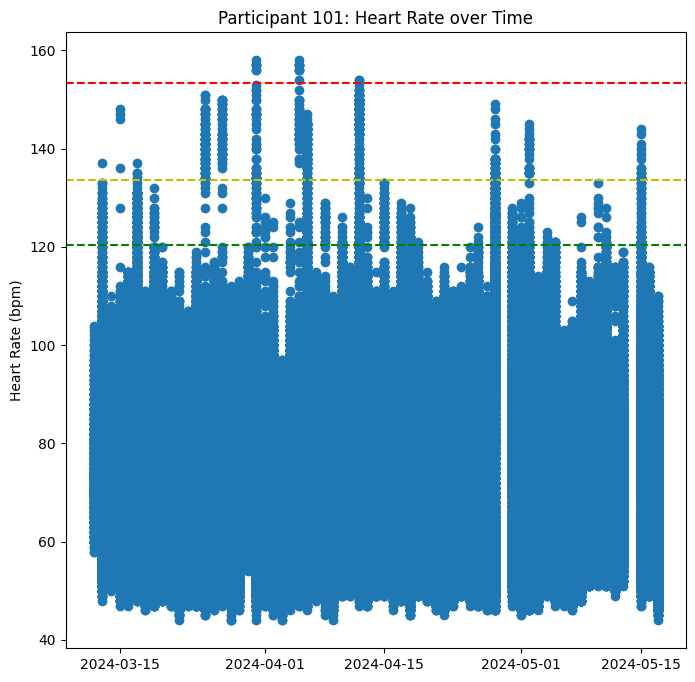

In [4]:
# Extract heart rate zones
MICT_lower_val = df['target_hr_45'].unique()[0]
MICT_upper_val = df['target_hr_55'].unique()[0]
HIIT_lower_val = df['target_hr_70'].unique()[0]
print('Heart rate targets:', MICT_lower_val, MICT_upper_val, HIIT_lower_val)

fig, ax = subplots(figsize=(8, 8))
ax.plot(df['_realdate'], df['value'], 'o')
ax.axhline(y=MICT_lower_val, color='g', linestyle='--')
ax.axhline(y=MICT_upper_val, color='y', linestyle='--')
ax.axhline(y=HIIT_lower_val, color='r', linestyle='--')
ax.set_ylabel('Heart Rate (bpm)')
ax.set_title('Participant 101: Heart Rate over Time');

### Investigate Data in MICT, HIIT zones

In [5]:
# Extract time only
df['_realtimeonly']=df['_realtime'].dt.time
df['_realtimeonly']=df['_realtimeonly'].astype(str)
df['_realtimeonly']=pd.to_datetime(df['_realtimeonly'])

#df=df.groupby(['_realdate'])['_realtimeonly'].agg(['sum'])

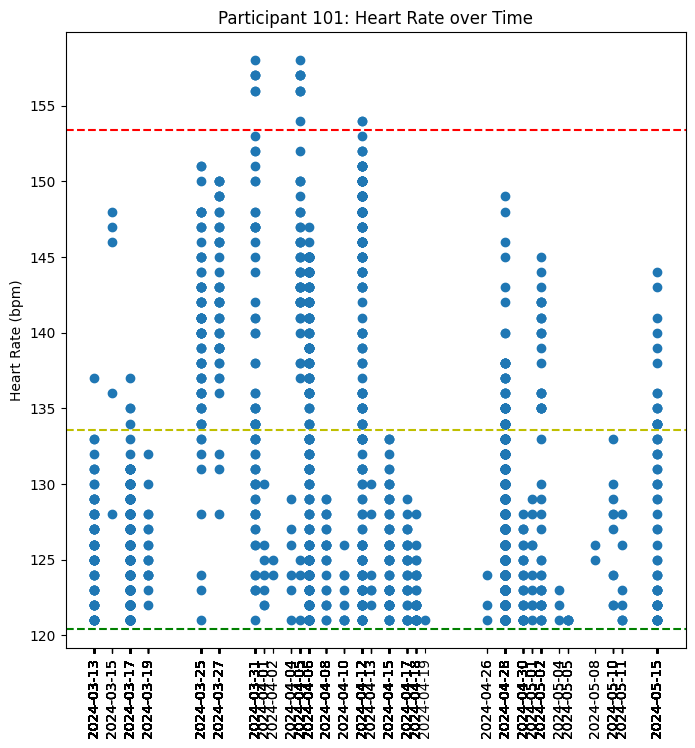

In [6]:
MICT_zone = df[df['value']>=MICT_lower_val]

fig, ax = subplots(figsize=(8, 8))
ax.plot(MICT_zone['_realdate'], MICT_zone['value'], 'o')
ax.axhline(y=MICT_lower_val, color='g', linestyle='--')
ax.axhline(y=MICT_upper_val, color='y', linestyle='--')
ax.axhline(y=HIIT_lower_val, color='r', linestyle='--')
ax.set_ylabel('Heart Rate (bpm)')
ax.set_title('Participant 101: Heart Rate over Time')
ax.set_xticks(MICT_zone['_realdate'])
ax.tick_params(axis='x', rotation=90);

### Stats on time in MICT zone for control participant

In [7]:
#test=pd.DataFrame(MICT_zone['_realtimeonly'].diff())
#print("Total time spent in MICT zone or above:", test['_realtimeonly'].sum())

print("Total observations in MICT zone: n=", MICT_zone.shape[0])
print("Total observations in Fitbit df: n=", df.shape[0])

print("Percent of recorded time in MICT zone:", round(MICT_zone.shape[0] / df.shape[0] * 100,3), "%")

print("Max heart rate observed:", MICT_zone['value'].max())
MICT_zone['value'].min()
print("Number of unique days in MICT:", MICT_zone['_realdate'].nunique())
print("Number of unique days recorded with Fitbit:", df['_realdate'].nunique())

Total observations in MICT zone: n= 2301
Total observations in Fitbit df: n= 783237
Percent of recorded time in MICT zone: 0.294 %
Max heart rate observed: 158
Number of unique days in MICT: 31
Number of unique days recorded with Fitbit: 65


### Unique dates wearing Fitbit

In [91]:
print("Unique dates wearing Fitbit:")
df['_realdate'].unique()

Unique dates wearing Fitbit:


array([datetime.date(2023, 1, 26), datetime.date(2023, 1, 27),
       datetime.date(2023, 1, 28), datetime.date(2023, 1, 29),
       datetime.date(2023, 1, 30), datetime.date(2023, 1, 31),
       datetime.date(2023, 2, 1), datetime.date(2023, 2, 4),
       datetime.date(2023, 2, 5), datetime.date(2023, 2, 6),
       datetime.date(2023, 2, 7), datetime.date(2023, 2, 8),
       datetime.date(2023, 2, 9), datetime.date(2023, 2, 10),
       datetime.date(2023, 2, 11), datetime.date(2023, 2, 12),
       datetime.date(2023, 2, 13), datetime.date(2023, 2, 14),
       datetime.date(2023, 2, 15), datetime.date(2023, 2, 16),
       datetime.date(2023, 2, 17), datetime.date(2023, 2, 18),
       datetime.date(2023, 2, 19), datetime.date(2023, 2, 20),
       datetime.date(2023, 2, 21), datetime.date(2023, 2, 22),
       datetime.date(2023, 2, 23), datetime.date(2023, 2, 24),
       datetime.date(2023, 2, 25), datetime.date(2023, 2, 26),
       datetime.date(2023, 2, 27)], dtype=object)

# Capture / iterate over all participant files

In [9]:
#path = "/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableHK-HKPolarFlow/069_qtz1b18463486141211762_hr_WearableHK_HKPolarFlow.csv"

In [21]:
import glob
import os
directory_path = "/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit"

# Use glob to get a list of all Excel files in the directory
file_paths = glob.glob(os.path.join(directory_path, "*.csv"))
file_paths

['/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/070_qtz1b14637549187739211_hr_WearableFitbit_Fitbit.csv',
 '/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/081_qtz1b16719481142363772_hr_WearableFitbit_Fitbit.csv',
 '/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/037_qtz1b19851346611142986_hr_WearableFitbit_Fitbit.csv',
 '/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/097_qtz1b15382499214278169_hr_WearableFitbit_Fitbit.csv',
 '/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/004_qtz1b18445579426718188_hr_WearableFitbit_Fitbit.csv',
 '/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/

## Import Redcap data from Drive

In [15]:
demog_path = "/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/Redcap/Processed_Data/64208_Demographics_Processed.csv"
demog = pd.read_csv(demog_path)
demog

,record_id,enrollment_status,sex,race,ethnicity,age,agegroup,Group,current_week,start_month,...,bl_heart_rate_hiit,bl_heart_rate_mict,control_crossover,total_workouts_in_REDCap,quality_workouts_in_REDCap,number_polar_used,number_fitbit_used,quality_fraction,training_status,percent_complete_of_36_wkts
0,1,Screen failed,Male,Asian Indian,"No, not of Hispanic, Latino, or Spanish origin",46.0,35-55 yrs,New Participant,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Screen failed,Female,Mixed race,"No, not of Hispanic, Latino, or Spanish origin",21.0,18-35 yrs,New Participant,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Completed,Female,Mixed race,"Yes, another Hispanic, Latino, or Spanish orig...",27.0,18-35 yrs,MICT,Completed,Jul 2023,...,143-164,117-127,NaN,21.0,20.0,21.0,15.0,95.2,Great,55.6
3,4,Completed,Female,Chinese,"No, not of Hispanic, Latino, or Spanish origin",38.0,35-55 yrs,HIIT,Completed,May 2023,...,148-169,121-132,NaN,40.0,14.0,40.0,40.0,35.0,Poor,38.9
4,5,Completed,Female,Chinese,"No, not of Hispanic, Latino, or Spanish origin",26.0,18-35 yrs,MICT,Completed,Jun 2023,...,145-168,116-128,NaN,33.0,33.0,33.0,33.0,100.0,Great,91.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,119,Enrolled (not screened yet),Female,Chinese,"No, not of Hispanic, Latino, or Spanish origin",31.0,18-35 yrs,New Participant,Not Training Yet,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,120,Enrolled (not screened yet),Male,White,"No, not of Hispanic, Latino, or Spanish origin",24.0,18-35 yrs,New Participant,Not Training Yet,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,121,Enrolled (not screened yet),Female,Chinese,"No, not of Hispanic, Latino, or Spanish origin",42.0,35-55 yrs,New Participant,Not Training Yet,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,1070,On-going Randomized,Male,NaN,NaN,26.0,18-35 yrs,MICT,Week 13,Mar 2024,...,NaN,NaN,NaN,28.0,26.0,28.0,28.0,92.9,Great,72.2


Error processing file /Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/qtz1b16816367966245858_hr_WearableFitbit_Fitbit.csv: '_realtime'
Error processing file /Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/qtz1b16873582559667274_hr_WearableFitbit_Fitbit.csv: '_realtime'
Error processing file /Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/qtz1b15382499214278169_hr_WearableFitbit_Fitbit.csv: '_realtime'


/var/folders/r7/jtcfw0ln6156s7dt2pw25pnr0000gq/T/ipykernel_3329/242196883.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = subplots(figsize=(8, 8))


Error processing file /Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/qtz1b11132327442988757_hr_WearableFitbit_Fitbit.csv: '_realtime'
Error processing file /Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/qtz1b13151339151441543_hr_WearableFitbit_Fitbit.csv: '_realtime'
Error processing file /Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/qtz1b13693799398481324_hr_WearableFitbit_Fitbit.csv: '_realtime'


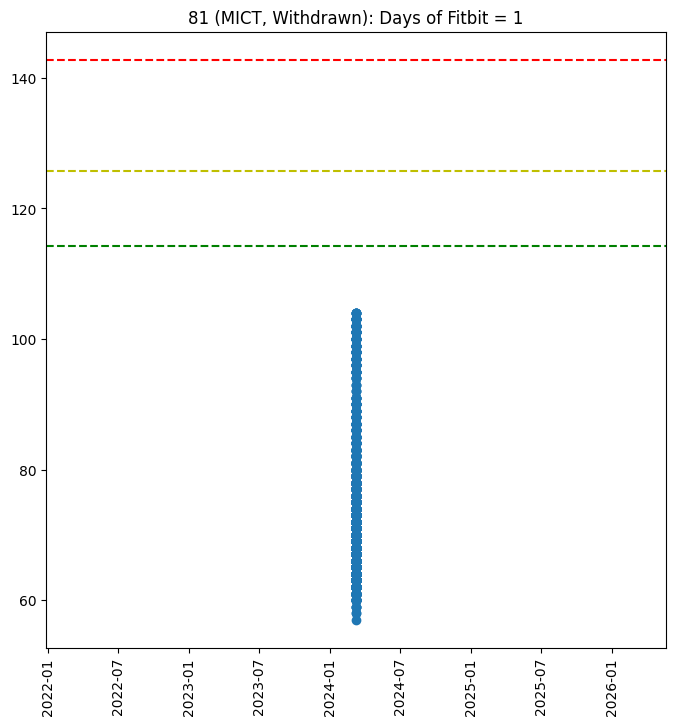

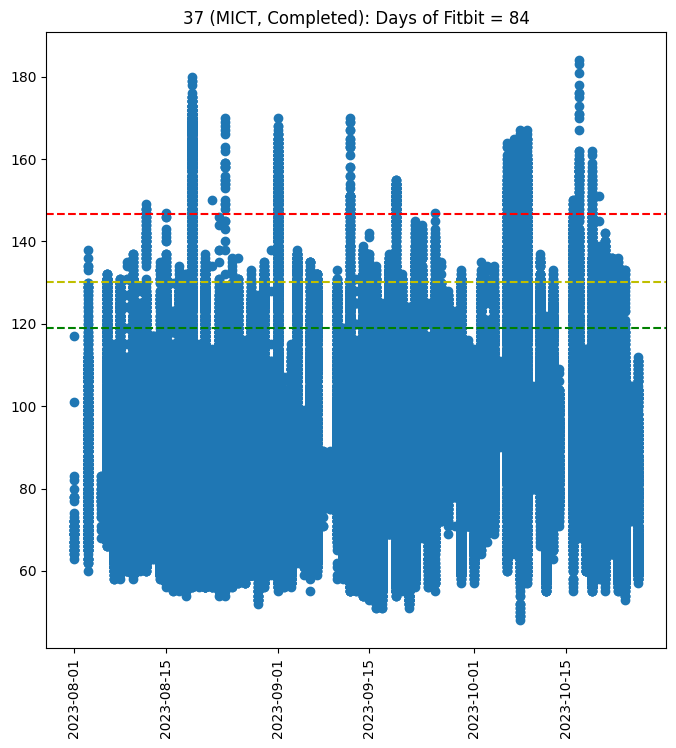

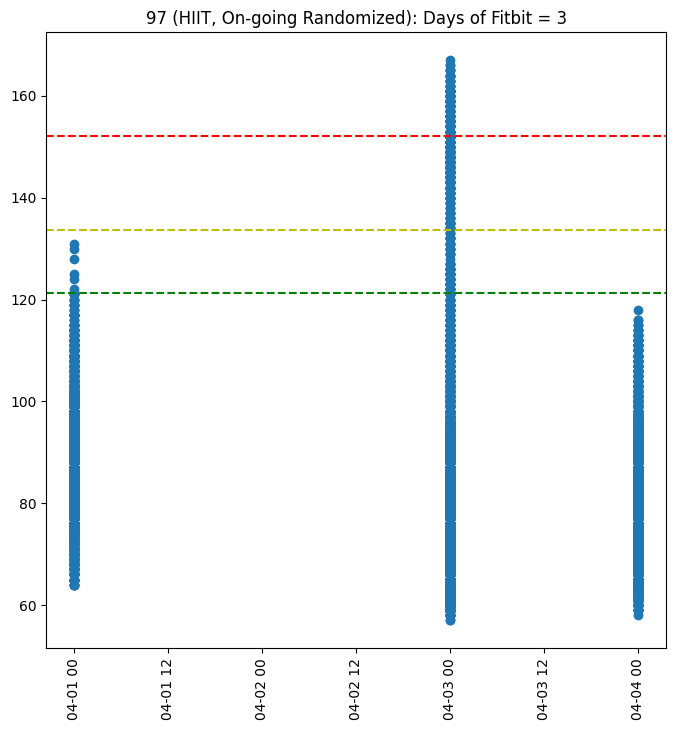

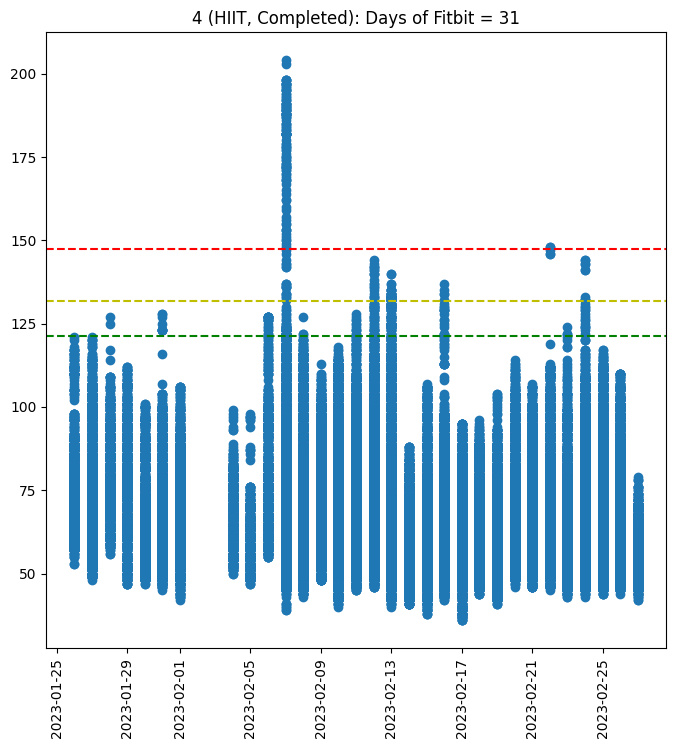

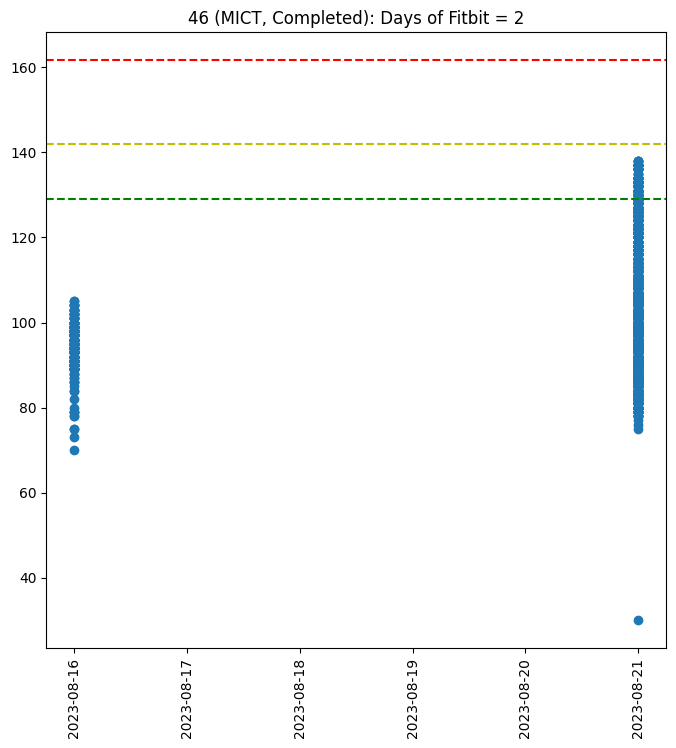

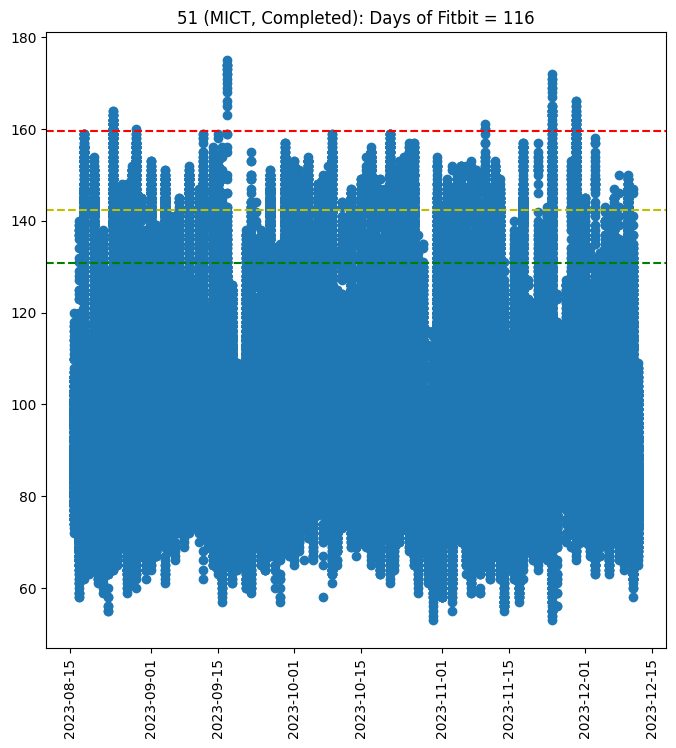

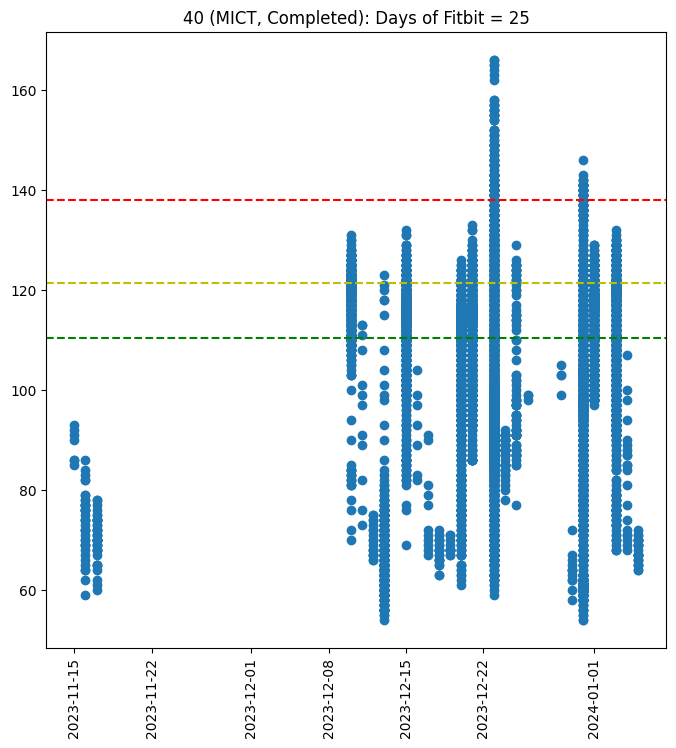

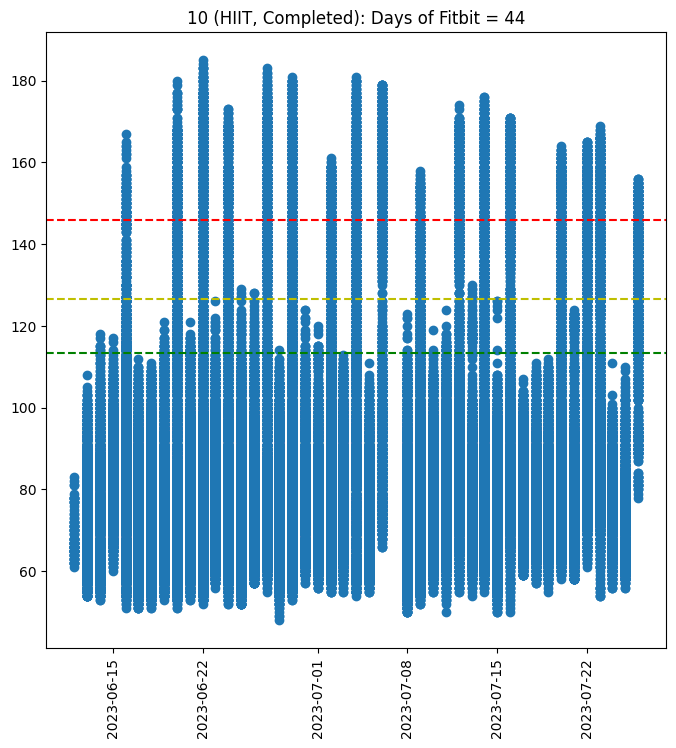

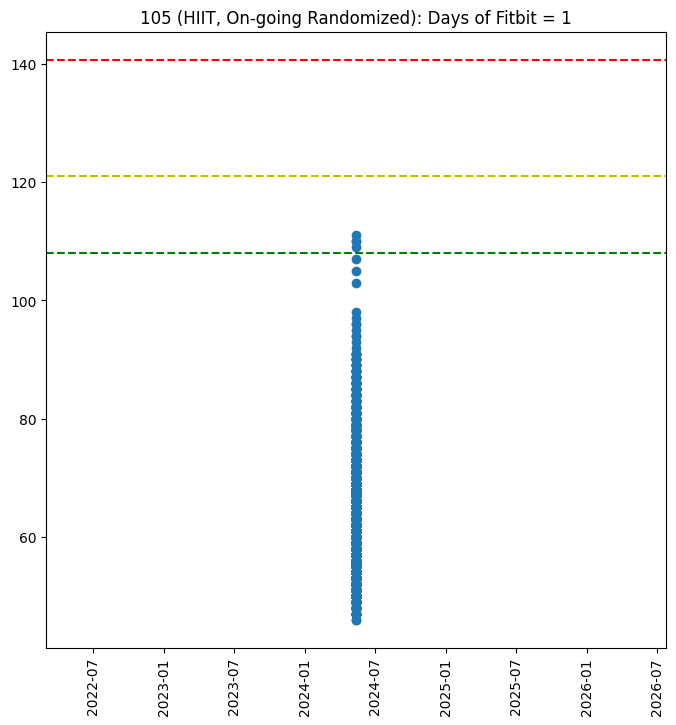

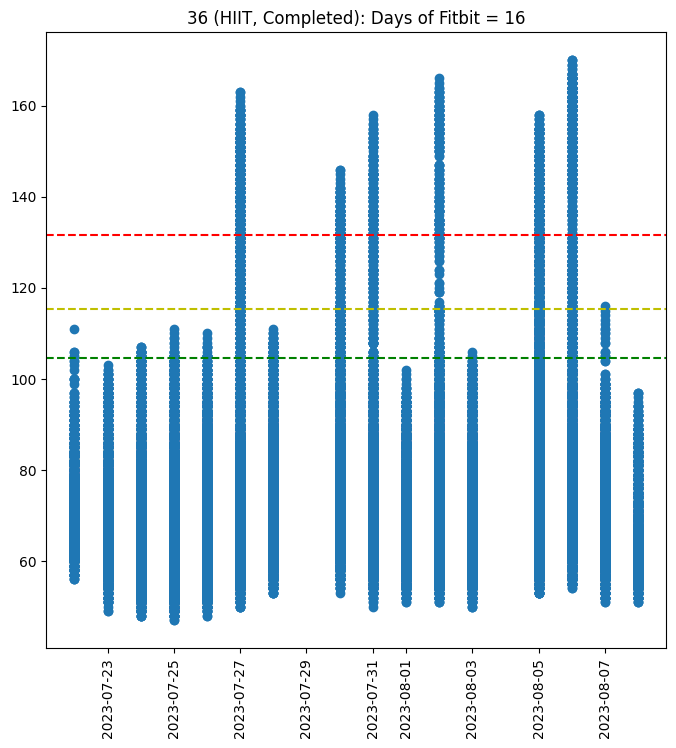

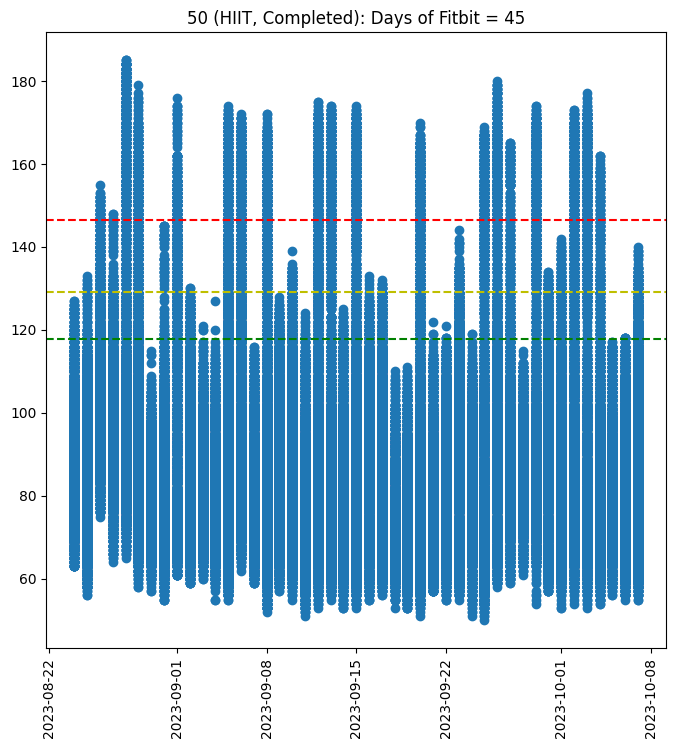

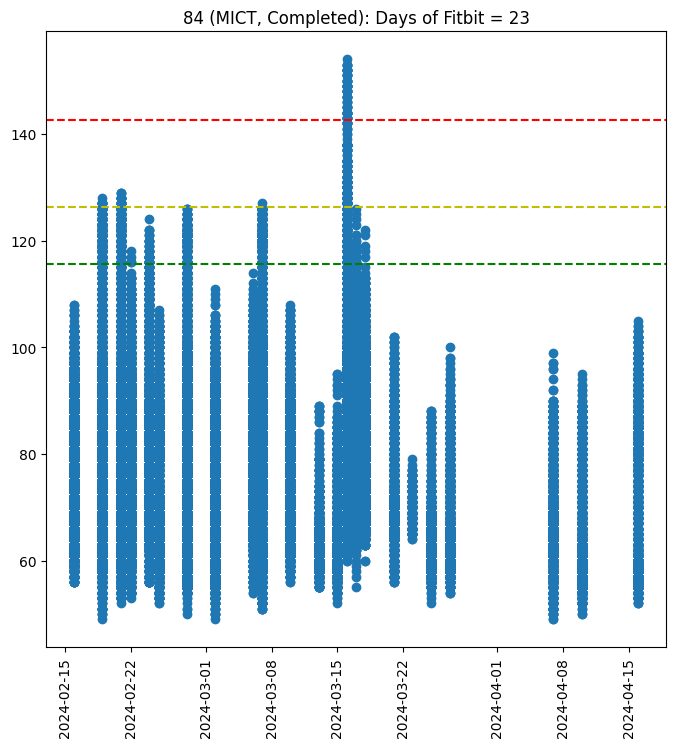

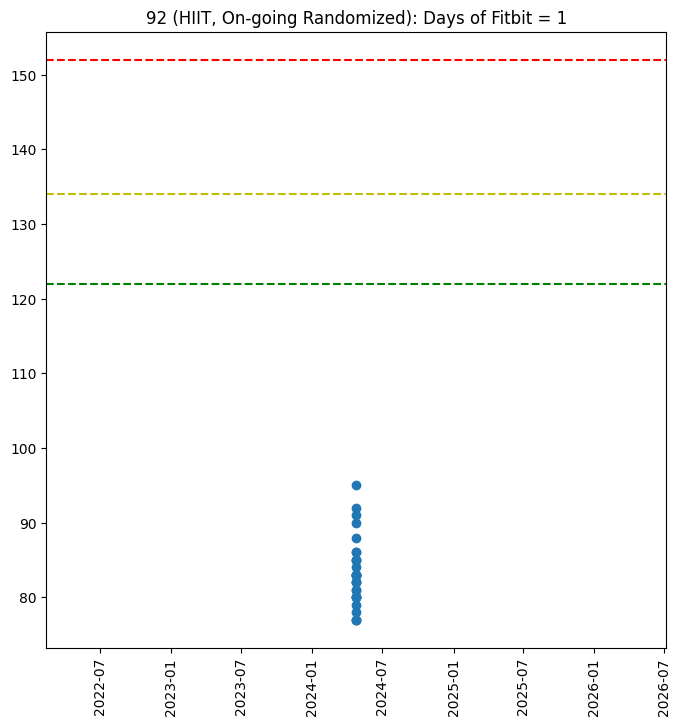

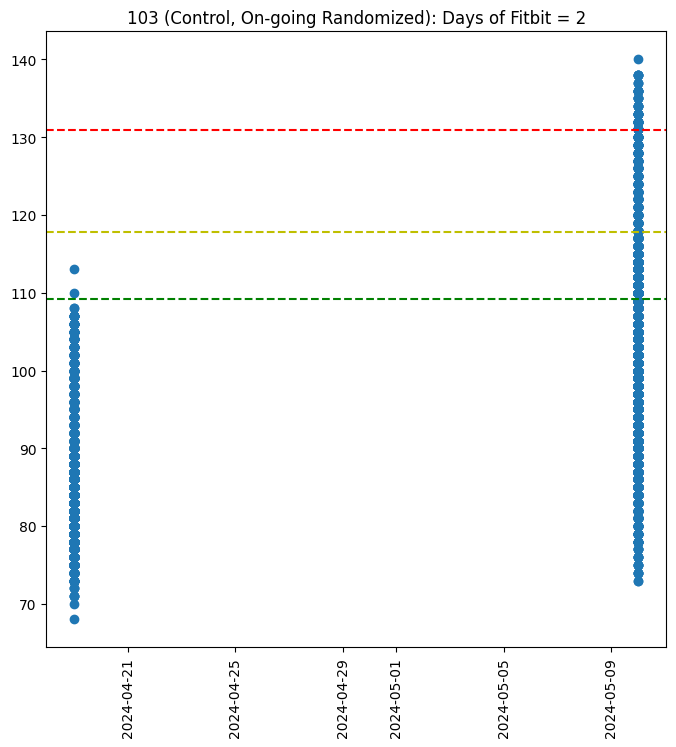

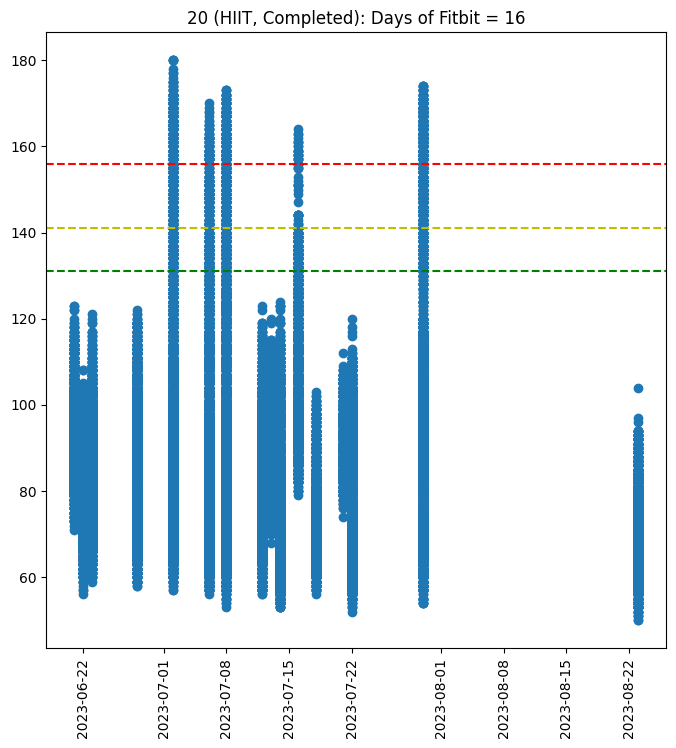

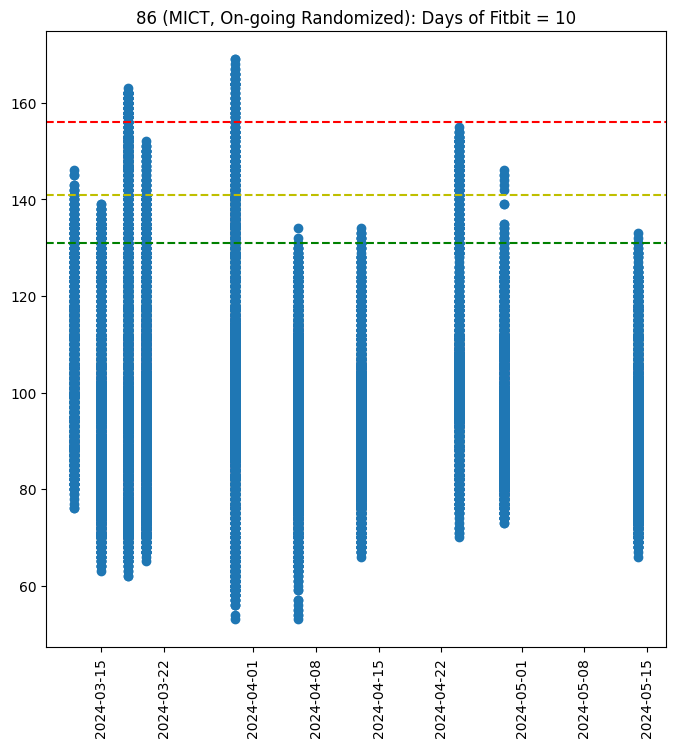

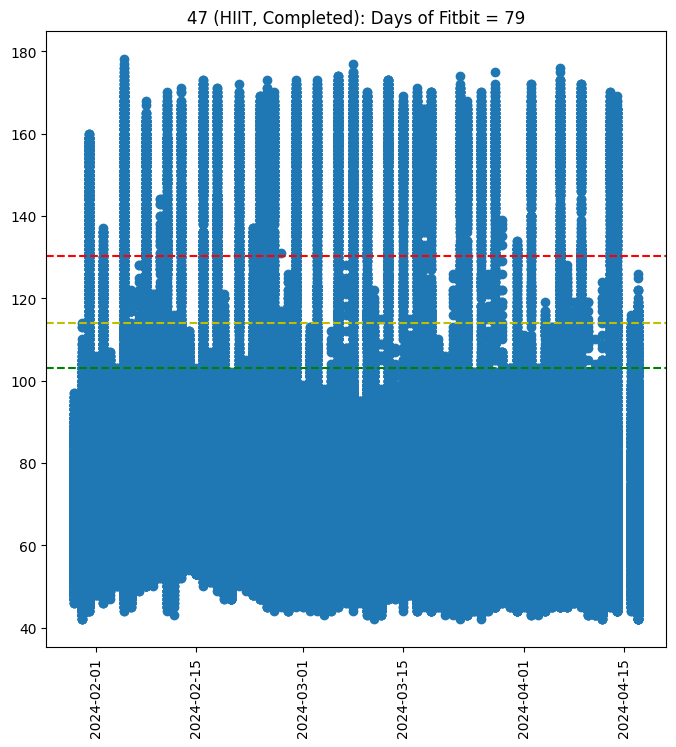

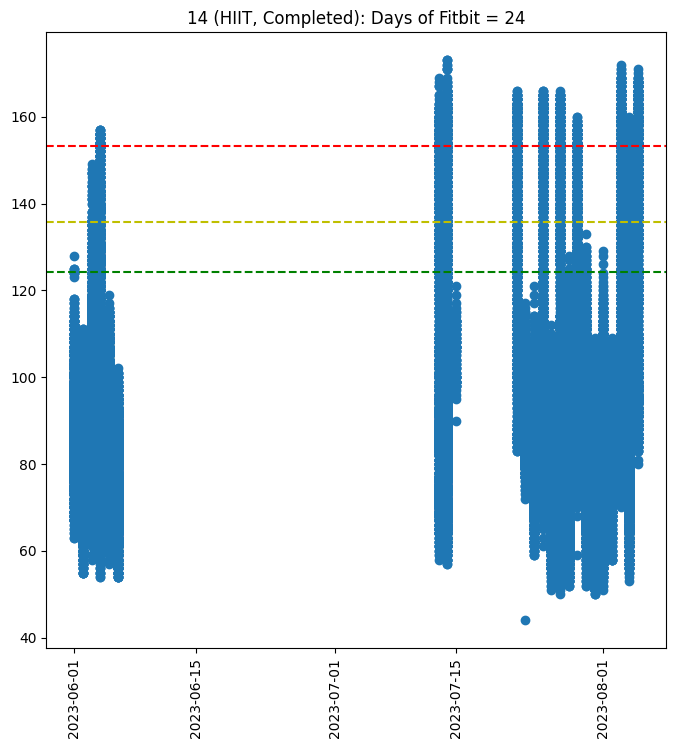

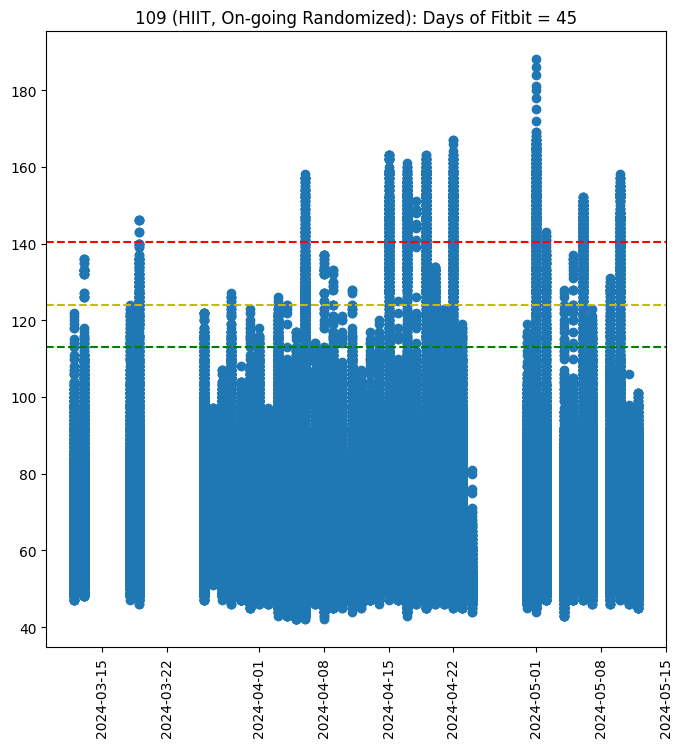

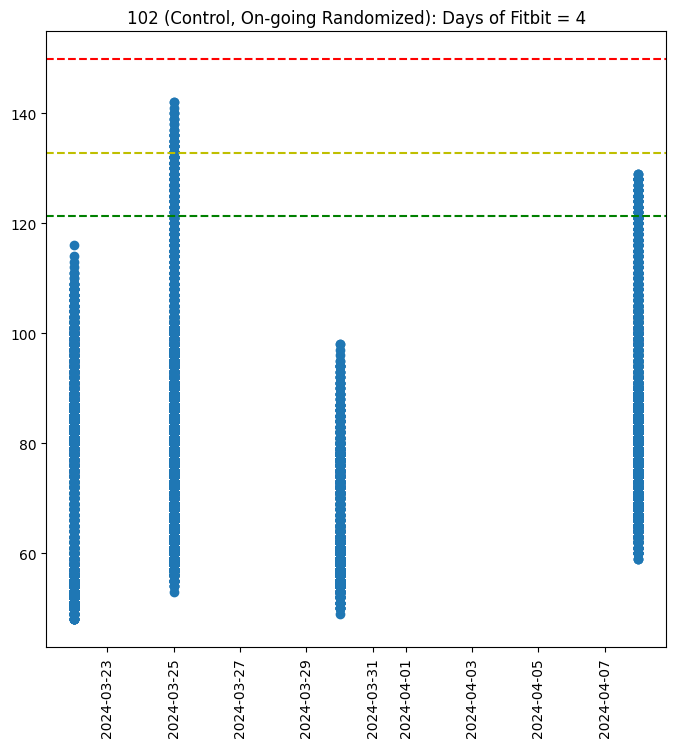

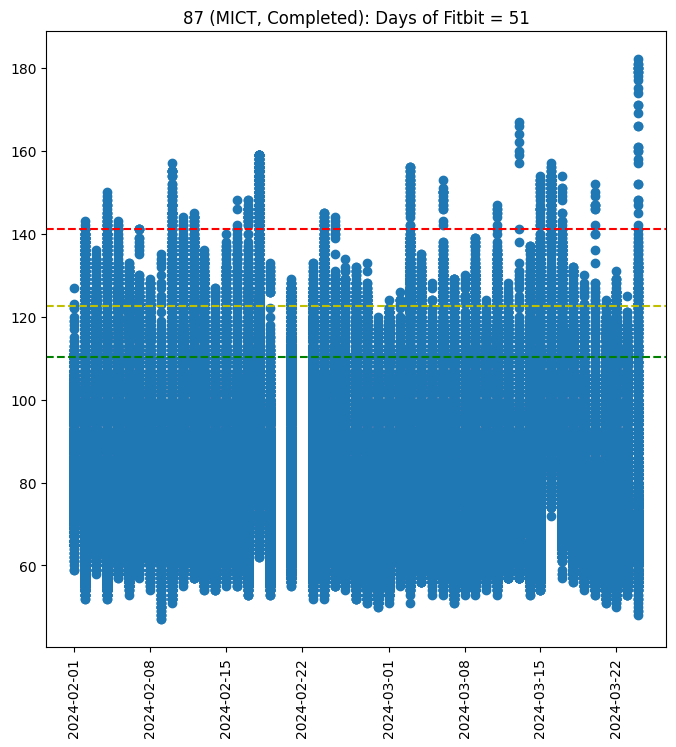

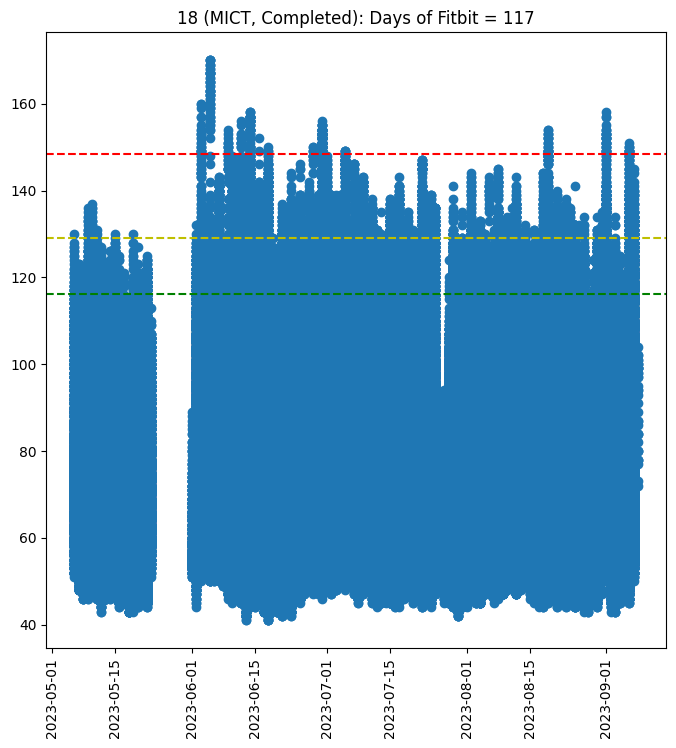

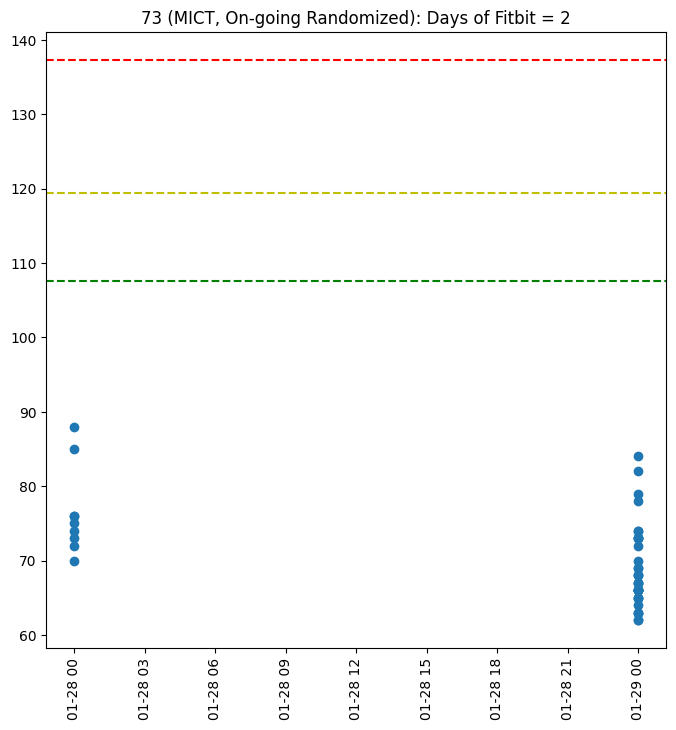

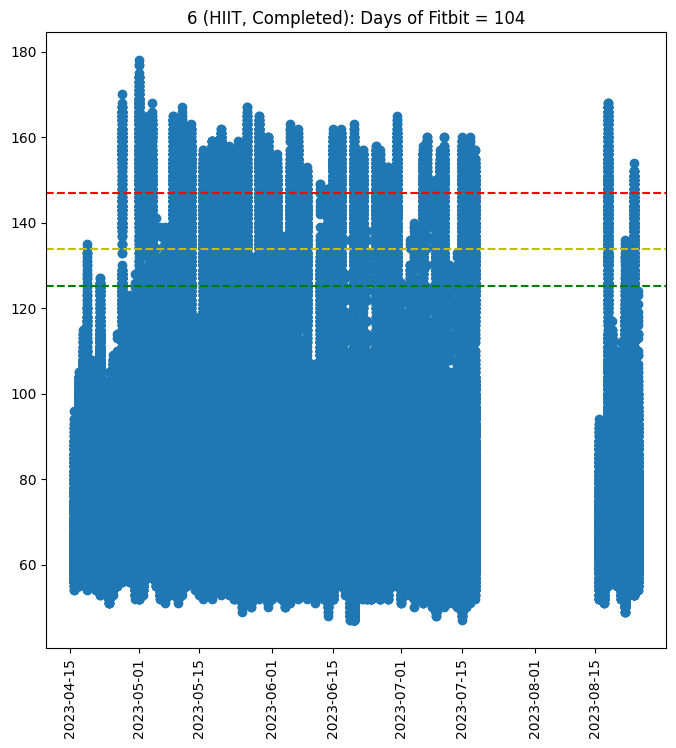

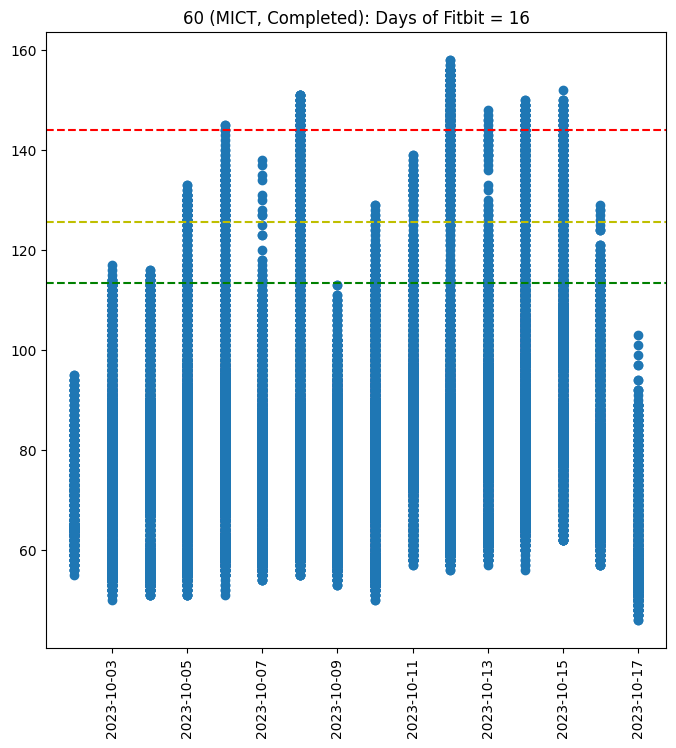

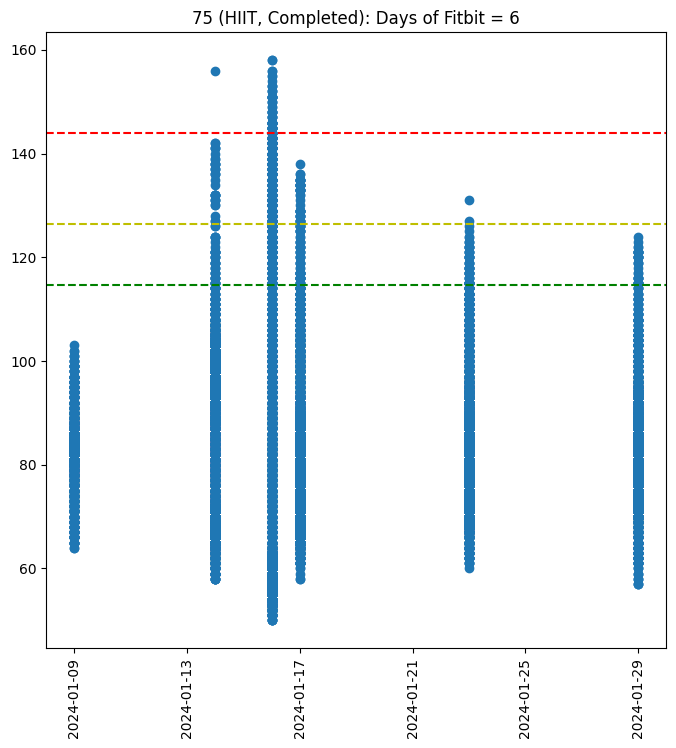

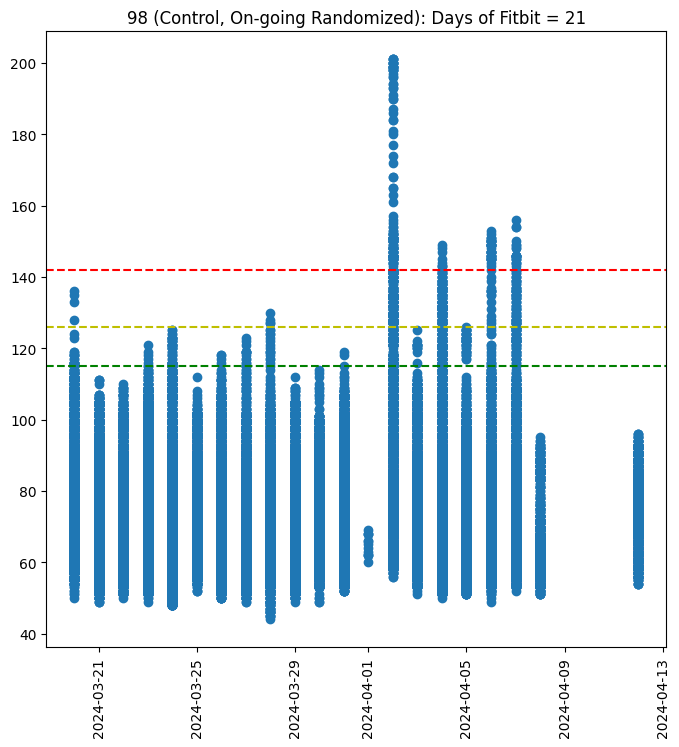

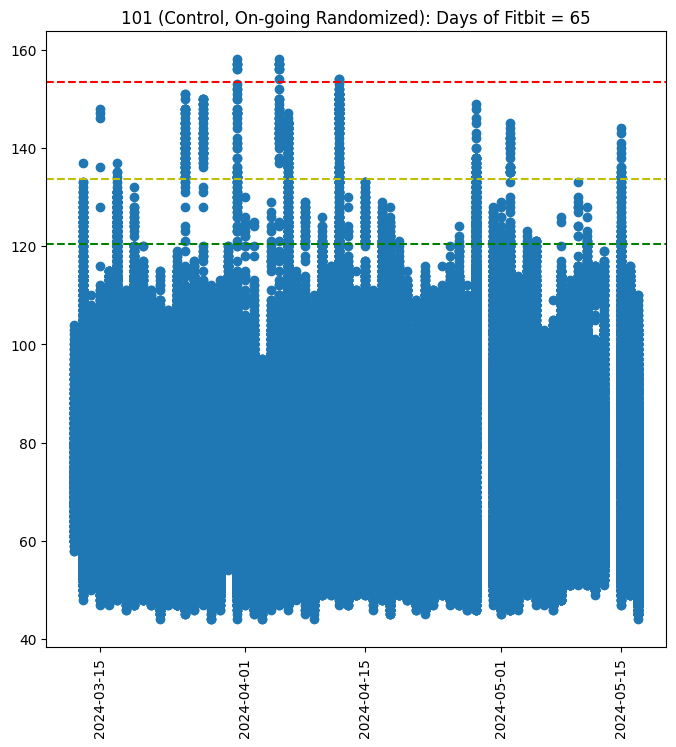

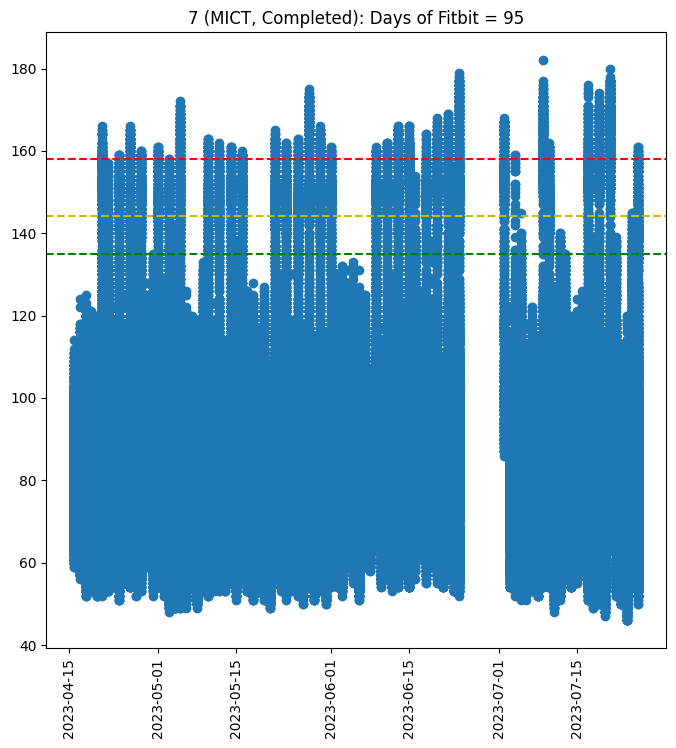

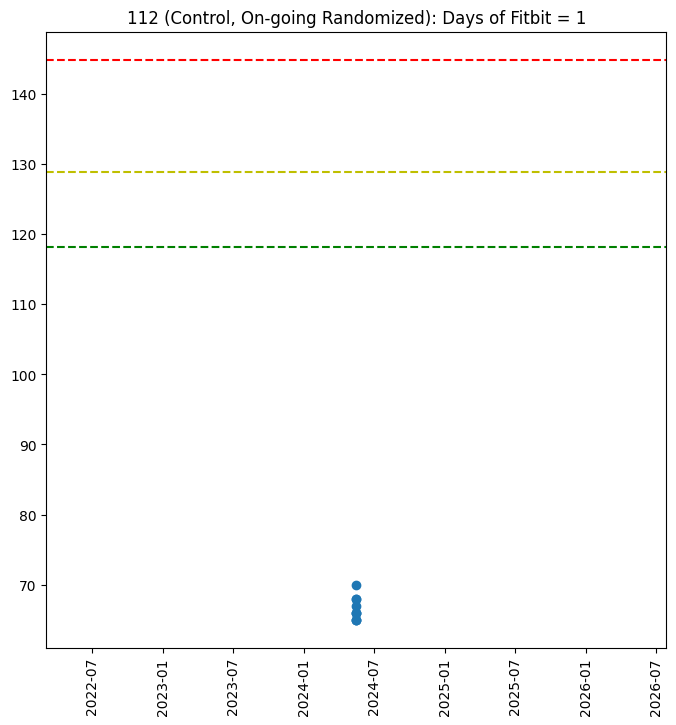

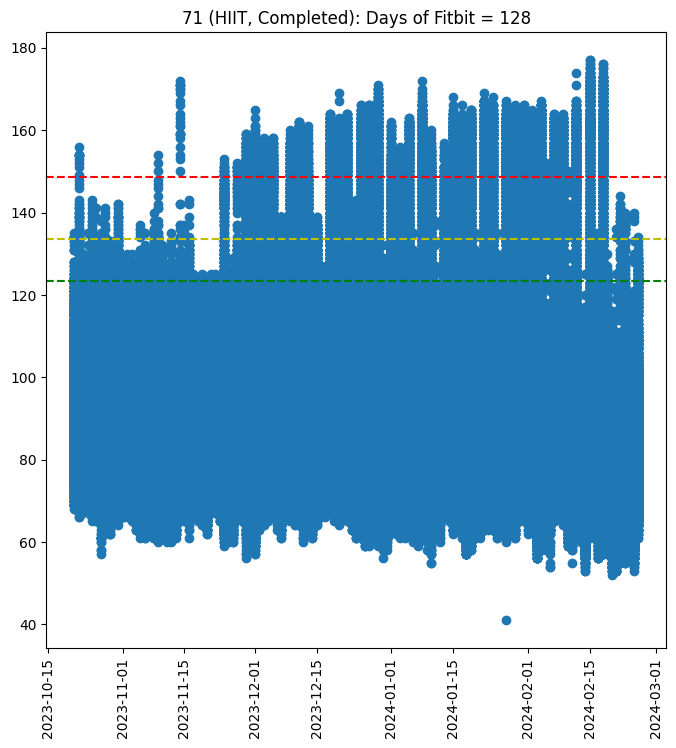

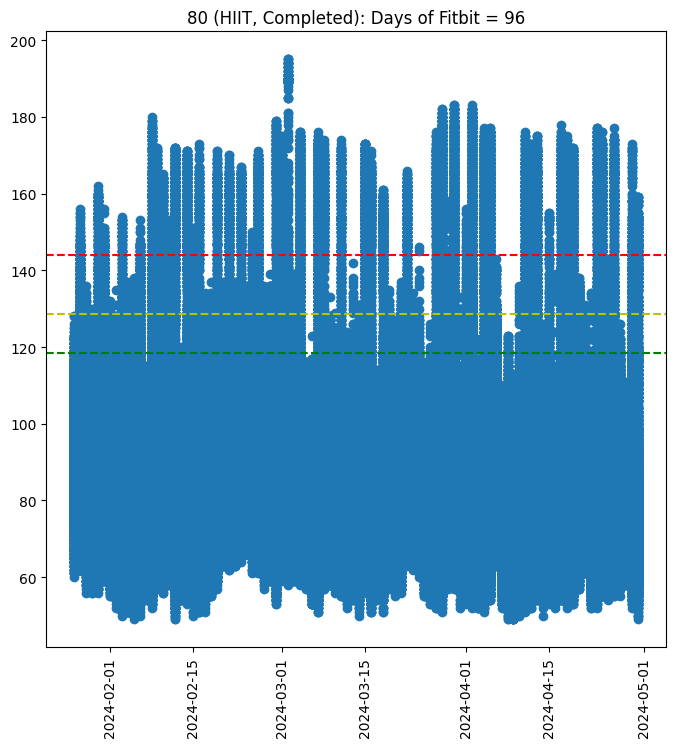

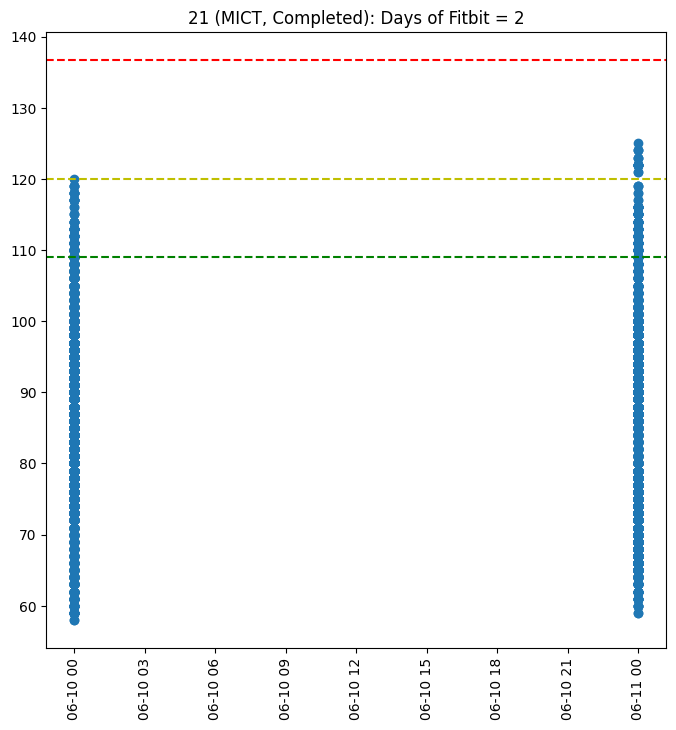

In [24]:
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame()

fp=file_paths[1:40]
# Loop over the list of pathnames and process each file
for pathname in fp:
     try:

         # Get Fitbit data
         df = pd.read_csv(pathname)
         # convert to date only
         df['_realtime'] = pd.to_datetime(df['_realtime'])
         df['_realdate'] = df['_realtime'].dt.date
         ppt_id = df['ppt_id'][1]
         unique_days = str(df['_realdate'].nunique())
         # Extract heart rate zones
         MICT_lower_val = df['target_hr_45'].unique()[0]
         MICT_upper_val = df['target_hr_55'].unique()[0]
         HIIT_lower_val = df['target_hr_70'].unique()[0]

         # Add demographic data
         group=demog[demog['record_id']==ppt_id]['Group'].iloc[0]
         status=demog[demog['record_id']==ppt_id]['enrollment_status'].iloc[0]
         
         # Make plot of all Fitbit data over time
         fig, ax = subplots(figsize=(8, 8))
         ax.plot(df['_realdate'], df['value'], 'o')
         ax.axhline(y=MICT_lower_val, color='g', linestyle='--')
         ax.axhline(y=MICT_upper_val, color='y', linestyle='--')
         ax.axhline(y=HIIT_lower_val, color='r', linestyle='--')
         ax.set_title(f"{ppt_id} ({group}, {status}): Days of Fitbit = {unique_days}")
         ax.tick_params(axis='x', rotation=90)

        
     except Exception as e:
         print(f"Error processing file {pathname}: {e}")

In [53]:
# Count number of days of Fitbit
# Initialize an empty DataFrame to store results
dfs=[]
fp=file_paths[1:40]
# Loop over the list of pathnames and process each file
for pathname in fp:
     try:
         # Get Fitbit data
         df = pd.read_csv(pathname)
         # convert to date only
         df['_realtime'] = pd.to_datetime(df['_realtime'])
         df['_realdate'] = df['_realtime'].dt.date
         ppt_id = df['ppt_id'].iloc[0]
         unique_days = str(df['_realdate'].nunique())

         # Add demographic data
         group=demog[demog['record_id']==ppt_id]['Group'].iloc[0]
         status=demog[demog['record_id']==ppt_id]['enrollment_status'].iloc[0]
         
         # Create DataFrame with results for this file
         result_df = pd.DataFrame({'ppt_id': [ppt_id],'Enrollment_Status': [status], 'Group': [group], 'Fitbit_Days': [unique_days]})
        
        # Append to list of DataFrames
         dfs.append(result_df)
         
     except Exception as e:
         print(f"Error processing file {pathname}: {e}")

Error processing file /Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/qtz1b16816367966245858_hr_WearableFitbit_Fitbit.csv: '_realtime'
Error processing file /Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/qtz1b16873582559667274_hr_WearableFitbit_Fitbit.csv: '_realtime'
Error processing file /Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/qtz1b15382499214278169_hr_WearableFitbit_Fitbit.csv: '_realtime'
Error processing file /Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/qtz1b11132327442988757_hr_WearableFitbit_Fitbit.csv: '_realtime'
Error processing file /Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/qtz1b13151339151441543_hr_Wear

In [75]:
results_df = pd.concat(dfs, ignore_index=True)
# Reset index and drop the old index
results_df = results_df.reset_index(drop=True)

# Display the sorted DataFrame without the index
results_df['Fitbit_Days'] = pd.to_numeric(results_df['Fitbit_Days'])

# Sort by Fitbit_Days
#results_df = results_df.sort_values(by='Fitbit_Days', ascending=False)
results_df

,ppt_id,Enrollment_Status,Group,Fitbit_Days
0,81,Withdrawn,MICT,1
1,37,Completed,MICT,84
2,97,On-going Randomized,HIIT,3
3,4,Completed,HIIT,31
4,46,Completed,MICT,2
5,51,Completed,MICT,116
6,40,Completed,MICT,25
7,10,Completed,HIIT,44
8,105,On-going Randomized,HIIT,1
9,36,Completed,HIIT,16
